# Final Project: Yelp and Food Safety
#### Exploring the San Francisco Restaurant World

In this project, we will investigate a subset of the restaurants and related information from them adapted from Yelp data located in San Francisco, California. You will first explore some of the data about the restaurants themselves, calculating some summary statistics and trying to figure out some patterns in the data. Next we will merge that with a list of health inspection scores and violations that have been [made available by the San Francisco Department of Public Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i). Lastly, we will run some linear regression analysis to see if there is any meaningful relationships in the data. 


If you have any questions or get stuck or anything, feel free to come to office hours. 

**Helpful Resource:**

* [Python Reference](https://docs.google.com/document/d/1zpTTl47NoGf2A3_oE1YusLyb-cF2sZMALdCMM5dpYIA/edit): Cheat sheet for Python and other functions used in this course


To get started on the final project, first run the following cell to import some necessary packages, and have fun! 


In [1]:
# importing some helful libraries
import pandas as pd
import numpy as np
from functions import * 

# downloading necessary data 

# !wget 

from project_helper import * 

def check(*args):
    return None

# **1. San Francisco Restaurant Data**

In this section you'll be learning a few extra useful features of _dataframes_, which we previously used in lab 3 as a way to managing data for analysis. 

As you might have noticed, the package we are using is called _Pandas_, which is the most commonly used package to clean and analyze data. You will learn some of the most important features of manipulating data using Pandas, and get a feel for exploring data using Python. 

## Part One: Loading the Data

As mentioned in lecture, we can use Pandas to read many differe types of data format and read it into a table. The most common are `.csv` files, which stand for comma-separated-values. 

Run the following cell to download two `.csv` files that contain the data you will be working with in this project.

In [2]:
# !wget ... 


As a side note, when you reopen this project in Google Colab, your code will remain, however it will delete any files you downloaded in the previous session. Just a friendly reminder to rerun that cell block to download the files each time you restart Google Colab.



### Question 1:

Now, load the files, named `businesses.csv` and `inspections.csv` into Pandas dataframes named `bus`, and `ins` respectively. 

Run the cell afterwards to check if you did this correctly.

In [3]:
## Your Code Here...

bus = ...
ins = ...

In [4]:
check('q1a', [bus, ins])

In [2]:
# delete cell
bus = pd.read_csv('data/businesses.csv')
ins = pd.read_csv('data/inspections.csv')

Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
We can use the `DataFrame.head` method to show the top few lines of the `bus` and `ins` dataframes. To show multiple return outputs in one single cell, you can use `display()`.

Run the following cell to display the both data frames. 

In [6]:
display(bus.head(), ins.head())

,name,display_address,type,rating,review_count,price,latitude,longitude,bid
0,House of Prime Rib,"1906 Van Ness Ave, San Francisco, CA 94109",American (Traditional),4.52,7912,$$$,37.793338,-122.422827,3350
1,Burma Superstar,"309 Clement St, San Francisco, CA 94118",Burmese,4.69,7145,$$,37.783004,-122.462539,1977
2,B Patisserie,"2821 California St, San Francisco, CA 94115",Bakeries,4.77,3006,$$,37.788014,-122.440756,71696
3,Kokkari Estiatorio,"200 Jackson St, San Francisco, CA 94111",Greek,4.81,4843,$$$,37.796918,-122.399864,2858
4,San Tung,"1031 Irving St, San Francisco, CA 94122",Chinese,4.58,7497,$$,37.763891,-122.468805,67330


,iid,date,score,type,bid,timestamp,year
0,100504_20190411,04/11/2019 12:00:00 AM,88,Routine - Unscheduled,100504,2019-04-11,2019
1,100504_20190619,06/19/2019 12:00:00 AM,-1,New Ownership,100504,2019-06-19,2019
2,100504_20190927,09/27/2019 12:00:00 AM,-1,Reinspection/Followup,100504,2019-09-27,2019
3,100992_20190517,05/17/2019 12:00:00 AM,-1,Non-inspection site visit,100992,2019-05-17,2019
4,100992_20190621,06/21/2019 12:00:00 AM,-1,New Ownership,100992,2019-06-21,2019


You can also use the `DataFrame.describe` method to learn about the numeric columns of each dataframe. It can be handy for computing summaries of various statistics of our dataframes. 

Try it out with our two dataframes.

In [7]:
# Try displaying the DataFrame.describe outputs for bus and ins

## Your code here...

In [8]:
# delete this cell 
display(bus.describe(), ins.describe())

,rating,review_count,latitude,longitude,bid
count,658.000000,658.000000,658.000000,658.000000,658.000000
mean,4.086611,1239.186930,-4645.035430,-4730.493422,55116.506079
std,0.408482,977.693558,5010.965175,4930.982011,34643.693046
min,2.880000,157.000000,-9999.000000,-9999.000000,31.000000
25%,3.790000,616.250000,-9999.000000,-9999.000000,15755.000000
50%,4.090000,966.000000,37.749223,-122.477503,68375.000000
75%,4.380000,1564.500000,37.782897,-122.420564,82940.500000
max,4.980000,7912.000000,37.807854,-122.388189,102398.000000


,score,bid,year
count,3056.000000,3056.000000,3056.000000
mean,47.749673,54402.915249,2017.900851
std,45.423231,34729.741573,0.922701
min,-1.000000,31.000000,2016.000000
25%,-1.000000,7786.000000,2017.000000
50%,78.000000,68394.000000,2018.000000
75%,90.000000,82909.000000,2019.000000
max,100.000000,102398.000000,2019.000000


From its name alone, we expect the `bus.csv` file to contain information about the restaurants. Let's do some Exploratory Data Analysis (EDA), and see if we can get a better understanding of the data. 



## Part 2: Exploring the Data

In lab 3, we refered to the data in a column as an array. Another term that it can be called is a `Series`, which is just a fancier version of an array. 

The nice thing about Series' is that they have lots of [built in functions within them](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) that are called methods. 


- The [`Series.unique`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) method returns an array of all the unique entries inside of a Series. 

- The [`Series.value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method returns a new series that lists the number of occurencies of each unique element in a Series. 

Read the documentation is you want a deeper look at these functions, you can also look at some examples of how they are used. 

### Question 2a:

Notice that there are two different identifiers for businesses in our dataset, `bid` which is an identification number, as well as `name`. 

For both of these variables, figure out the number of unique entires, and assign them to `n_bus`, and `n_bid`.

In [9]:
## Your Code Here...
n_bus = ...
n_bid = ...

print(' Number of Unique Businesses: ', n_bus, "\n Number of Unique Business ID: ", n_bid)

 Number of Unique Businesses:  Ellipsis 
 Number of Unique Business ID:  Ellipsis


In [10]:
#delete
n_bid = len(bus['bid'].unique())
n_bus = len(bus['name'].unique())

print(' Number of Unique Businesses: ', n_bus, "\n Number of Unique Business ID: ", n_bid)

 Number of Unique Businesses:  607 
 Number of Unique Business ID:  658


In [11]:
check('q2a', n_bus)

Interesting. There are more unique `bid`'s than there are `name`'s. As you might have guessed, this is because there might be more than one location of a restaurant, yet both the `bid` and `name` can be used to identify restaurants. Since `bid` also distinguishes between the locations of a restaurant, we say `bid` is more _granular_ in data.

### Question 2b:

Find the name of the restaurant with the most number of occurences in our dataset, and assign it's name as a string to `most_locations`. 

In [12]:
#delete me
bus['name'].value_counts() 

One Market Restaurant           9
Philz Coffee                    5
Cake Coquette                   5
Tonga Room & Hurricane Club     4
Bake Cheese Tart                4
                               ..
Manora's Thai Cuisine           1
Sushi Goemon                    1
Fifty / Fifty Coffee and Tea    1
KUSAKABE                        1
Wayo Sushi                      1
Name: name, Length: 607, dtype: int64

In [13]:
## Your Answer Here...
most_locations = ...

In [14]:
check('q2b', most_locations)

### Question 2c:

The cool thing about Series is that when you apply comparison operators to them, it does it for each entry in the Series. Figure out how many restaurants chains have more than one location, and assign that to `num_mult_locations`. 

_Hint: Remember that True and 1 and the same. First try getting a series of booleans and then use that to find the number of locations._

In [15]:
## Your Code Here... 
num_mult_locations = ...

In [ ]:
num_mult_locations = sum(series.value_counts() > 1)

In [16]:
check('q2c', num_mult_locations)

You can also use other comparisons to return a series of booleans, refer to Lecture 2 for a list of comparison operators. This is very useful for filtering data from dataframes, which we shall do in the next problem.

## Part 3: Exploring the Data (cont.)

So far, you've had a chance to select and analyze data from a single column of a dataframe. This is useful when we want to analyze information accross the observations we have (for example, accross all restaurants in our dataset). Often times we also want only consider a certain subset of our observations (for example only selecting the Italian restaurants). 

There are [many ways to select subsets of data](https://pandas.pydata.org/docs/user_guide/indexing.html), but we will focus on boolean-indexing. 


Let's walk through a short little example:

In [17]:
# Output data frame for convenience
bus.head()

,name,display_address,type,rating,review_count,price,latitude,longitude,bid
0,House of Prime Rib,"1906 Van Ness Ave, San Francisco, CA 94109",American (Traditional),4.52,7912,$$$,37.793338,-122.422827,3350
1,Burma Superstar,"309 Clement St, San Francisco, CA 94118",Burmese,4.69,7145,$$,37.783004,-122.462539,1977
2,B Patisserie,"2821 California St, San Francisco, CA 94115",Bakeries,4.77,3006,$$,37.788014,-122.440756,71696
3,Kokkari Estiatorio,"200 Jackson St, San Francisco, CA 94111",Greek,4.81,4843,$$$,37.796918,-122.399864,2858
4,San Tung,"1031 Irving St, San Francisco, CA 94122",Chinese,4.58,7497,$$,37.763891,-122.468805,67330


Say I really liked _Burma Superstar_ and want all other restaurants with `type == 'Burmese'`. 

First, I can extract the `type` column as a Series, similarly to how we have done in Lab 3.

In [18]:
# Just run this cell
types = bus['type']
types


0      American (Traditional)
1                     Burmese
2                    Bakeries
3                       Greek
4                     Chinese
                ...          
653              Coffee & Tea
654                      Poke
655                      Bars
656                      Thai
657        Breakfast & Brunch
Name: type, Length: 658, dtype: object

You'll notice that on the left of the Series output, there are numbers that each correspond to a specific level of price. This is called the index, and it corresponds to the index (also on the left) in the `bus` dataframe. 

_Indices don't have to be in ascending order, and they also do not have to be numbers either, but more on this later._

Next, like in part 2c, I can use a comparison operator to find all indices that are equal to `'Burmese'`

In [19]:
burmese = types == 'Burmese'
burmese

0      False
1       True
2      False
3      False
4      False
       ...  
653    False
654    False
655    False
656    False
657    False
Name: type, Length: 658, dtype: bool

_Burma Superstar_, in index position 1 returns true, as expected. We can now use this Series to index into the `bus` dataframe. Rows that correspond `True` indices in the "indexer" will be kept, and all falses will be dropped. This will not change the original `bus` dataframe, so we have to reassign it to a new variable if we want to keep using it. 


In [20]:
burmese_restaurants = bus[burmese]
burmese_restaurants

,name,display_address,type,rating,review_count,price,latitude,longitude,bid
1,Burma Superstar,"309 Clement St, San Francisco, CA 94118",Burmese,4.69,7145,$$,37.783004,-122.462539,1977
90,B Star,"127 Clement St, San Francisco, CA 94118",Burmese,3.92,1995,$$,37.783093,-122.460649,33911
179,Burma Love,"211 Valencia St, San Francisco, CA 94103",Burmese,4.17,1452,$$,-9999.000000,-9999.000000,83643
198,Yamo,"3406 18th St, San Francisco, CA 94110",Burmese,4.04,2027,$,37.761882,-122.419599,1231


We walked through it step by step, but this can be done in one line as follows:


In [21]:
burmese_restaurants = bus[bus['type'] == 'Burmese']
burmese_restaurants

,name,display_address,type,rating,review_count,price,latitude,longitude,bid
1,Burma Superstar,"309 Clement St, San Francisco, CA 94118",Burmese,4.69,7145,$$,37.783004,-122.462539,1977
90,B Star,"127 Clement St, San Francisco, CA 94118",Burmese,3.92,1995,$$,37.783093,-122.460649,33911
179,Burma Love,"211 Valencia St, San Francisco, CA 94103",Burmese,4.17,1452,$$,-9999.000000,-9999.000000,83643
198,Yamo,"3406 18th St, San Francisco, CA 94110",Burmese,4.04,2027,$,37.761882,-122.419599,1231


### Question 3a:

Using boolean-indexing, create a new dataframe that only contains the rows in `bus` for the restaurant you found in part 2b (the string you assigned to `most_locations`) and assign it to `most_locations_df`. 


In [22]:
## Your Code Here...
most_locations_df = ...

In [23]:
check('q3a', most_locations_df)

We can also do more complicated selects over multiple different columns. As we've mentioned, the syntax in Python is very similar to English. 

Say I wanted to find restaurants that were both `type == 'Chinese'` AND had `price == '$$'`. The syntax would be exactly that! 

One finicky note however is that you cannot use `and` or `or`, instead you use the ampersand `&` and the pipe symbol `|` respectively.

In [24]:
# run this cell and see what it does
chinese_2 = bus[(bus['type'] == 'Chinese') & (bus['price'] == '$$')]
chinese_2

,name,display_address,type,rating,review_count,price,latitude,longitude,bid
4,San Tung,"1031 Irving St, San Francisco, CA 94122",Chinese,4.58,7497,$$,37.763891,-122.468805,67330
122,Hai Ky Noodles,"707 Ellis St, San Francisco, CA 94109",Chinese,4.62,1070,$$,37.784193,-122.417967,283
126,Dumpling Kitchen,"1935 Taraval St, San Francisco, CA 94116",Chinese,4.00,1875,$$,-9999.000000,-9999.000000,76942
415,Enjoy Vegetarian Restaurant,"754 Kirkham St, San Francisco, CA 94122",Chinese,3.48,569,$$,37.760198,-122.469081,17647
421,Mission Chinese Food,"2234 Mission St, Lung Shan Restaurant, San Fra...",Chinese,3.66,2361,$$,-9999.000000,-9999.000000,78215
474,Yuanbao Jiaozi,"2110 Irving St, San Francisco, CA 94122",Chinese,4.27,459,$$,-9999.000000,-9999.000000,94318
490,Kung Food,"1615 McAllister St, San Francisco, CA 94115",Chinese,3.66,617,$$,-9999.000000,-9999.000000,82022
573,Mr Szechuan,"890 Taraval St, San Francisco, CA 94116",Chinese,4.35,414,$$,-9999.000000,-9999.000000,86718
621,King of Noodles,"1639 Irving St, San Francisco, CA 94122",Chinese,3.98,802,$$,-9999.000000,-9999.000000,85307


### Question 3b: 

Create a dataframe that contains all restaurants that have a less than 4.0 rating and more than 1,000 reviews. Then, using this subset, figure out how many restaurants are each of the four price categoreies ('$', '$$', '$$$', and '$$$$') and assign it as a Series to the variable `q3b`. 

Your answer should have the indices be the corresponding price categories, and the counts of each categories as the values for each index. 


In [25]:
## Your Code Here...

q3b = ...

In [26]:
check('q3b', q3b)

### Question 3c:

You might have noticed that some of the longitude and latitude data is -9999. This is typically a way to indicate that the data is missing when dealing with numerical data instead of just leaving the space blank. 

#### Part 1:

Filter out the data that has missing coordinate data from `bus` and assign it to the dataframe `bus_coords`. 

In [27]:
## Your Code Here...

bus_coords = ...
bus_coords

Ellipsis

In [28]:
bus_coords = bus[(bus['latitude'] != -9999) & (bus['longitude'] != -9999)]

In [29]:
check('q3c1', bus_coords)

#### Part 2

Next, we'll use a new package called Seaborn to plot the coordinates on a graph. The cool thing about Seaborn is that it allows for easy way to encode new information to aspects of the plot, like color! 

We've imported Seaborn for you, and made a basic plot of all the restaurants using the `scatterplot` function, and coded their `review_count` into the color of each point. Take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) and have some fun plotting data from the `bus_location` dataframe.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

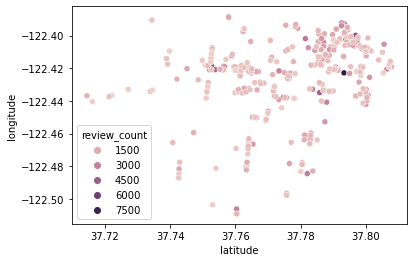

In [30]:
# A little example
import seaborn as sns

sns.scatterplot(data = bus_coords, 
                x = 'latitude', 
                y = 'longitude', 
                hue = 'review_count')

Some potential ideas:
- Look at the distributions of some select cuisines, are they clustered around each other? (Probably subset the data before plotting)
- Plot the locations of highly rated restaurants, and encode the size of each data point to the correspoding price rating 
- Encode the rating to the color of the data, and see if things are clustered together! 


Feel free to implement one of the ideas above, or try something new. 

Create your graph in the following code cell, and write down your findings as a comment in the same cell! 

In [31]:
## Your Code Here



## Write down your discoveries as a comment! 

# **2. Health Inspection Data**

In this next section, we're going to merge the health inspection data with our business data. We will be doing some more statistics in this part in addition to exploring the data. 

In [32]:
ins.head()

,iid,date,score,type,bid,timestamp,year
0,100504_20190411,04/11/2019 12:00:00 AM,88,Routine - Unscheduled,100504,2019-04-11,2019
1,100504_20190619,06/19/2019 12:00:00 AM,-1,New Ownership,100504,2019-06-19,2019
2,100504_20190927,09/27/2019 12:00:00 AM,-1,Reinspection/Followup,100504,2019-09-27,2019
3,100992_20190517,05/17/2019 12:00:00 AM,-1,Non-inspection site visit,100992,2019-05-17,2019
4,100992_20190621,06/21/2019 12:00:00 AM,-1,New Ownership,100992,2019-06-21,2019


Let's examine the inspection scores `ins['score']`

In [33]:
ins['score'].value_counts().head()

-1     1410
 96     193
 90     177
 94     160
 92     148
Name: score, dtype: int64

It looks like there are a lot of inspections with the `'score'` of `-1`. In fact, only health inspections of the 'Routine - Unscheduled' type are scored. 

In the following cell, we used the [`merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function from pandas to join the inspection data with the business data. You don't know to know how it works, but if you're curious read more in the documentation. The merged datafram is called `ins_named`

In [10]:
ins_named = ins.merge(right = bus, how = 'inner', on = 'bid')
ins_named.head()

,iid,date,score,type_x,bid,timestamp,year,name,display_address,type_y,rating,review_count,price,latitude,longitude
0,100504_20190411,04/11/2019 12:00:00 AM,88,Routine - Unscheduled,100504,2019-04-11,2019,Holy Gelato!,"1392 9th Ave, San Francisco, CA 94122",Gelato,4.65,1100,$$,-9999.0,-9999.0
1,100504_20190619,06/19/2019 12:00:00 AM,-1,New Ownership,100504,2019-06-19,2019,Holy Gelato!,"1392 9th Ave, San Francisco, CA 94122",Gelato,4.65,1100,$$,-9999.0,-9999.0
2,100504_20190927,09/27/2019 12:00:00 AM,-1,Reinspection/Followup,100504,2019-09-27,2019,Holy Gelato!,"1392 9th Ave, San Francisco, CA 94122",Gelato,4.65,1100,$$,-9999.0,-9999.0
3,100992_20190517,05/17/2019 12:00:00 AM,-1,Non-inspection site visit,100992,2019-05-17,2019,District Tea,"2154 Mission St, San Francisco, CA 94110",Bubble Tea,4.62,324,$$,-9999.0,-9999.0
4,100992_20190621,06/21/2019 12:00:00 AM,-1,New Ownership,100992,2019-06-21,2019,District Tea,"2154 Mission St, San Francisco, CA 94110",Bubble Tea,4.62,324,$$,-9999.0,-9999.0


### Question 4a:
Filter out the non-Routine Unscheduled inspections and assign it to the variable, `scores`.

In [35]:
## You code here...

scores = ...
scores



Ellipsis

In [11]:
# delete me
scores = ins_named[ins_named['score'] >0]

In [12]:
check('q4a', scores)

### Question 4b: 

#### Part 1:
Next, plot a bar chart of distribution of scores. There should be a bar for each of the discrete scores (a histogram would mask the details of the distribution)

_Hint: You can use_ `series.value_counts()` _to get the heights, and then use_ `series.value_counts().index` _to get the index of the series for the categories in a bar chart_


In [37]:
## Your Code Here....

#### Part 2:

Describe the qualities of the distribution of the inspection scores based on your histogram. Consider the skewness, the mean, the median, or any anomalous values. Are they any unusual features about this distribution? 

_Write your answer in this cell:_

### Question 4c: 

Let's figure out which restaurant had the worst score in our sample of data. Use `ins_named` to find the lowest score.

A method that might be useful is [`DataFrame.sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html). 

Then assign the name of the worst restaurant to `worst_restaurant`

In [38]:
## Your Code Here...

worst_restaurant = ...
worst_restaurant

Ellipsis

In [39]:
check('q4c', worst_restaurant)

### Question 4d: 

Let's see which restaurant has had the most extreme improvement in its health inspection rating, aka scores. Let the "swing" of a restaurant be defined as the difference between its highest-ever and lowest-ever rating. **Only consider restaurants with at least 3 ratings, aka rated for at least 3 times (3 scores)!** 

*Note*: The "swing" is of a specific business. There might be some restaurants with multiple locations; each location has its own "swing".

#### Part 1:

First, assign the Series of unique restaurant `bid`'s with more than three health ratings to the variable `unique_bids`. 

In [40]:
## Your Code Here...
unique_bids = ...
unique_bids

Ellipsis

#### Part 2: 

Next, make a for loop that loops through all of the `unique_bids`. In each iteration of the loop, you should create a subset of `scores`, then calculate the swing for that bid and append it to the list `swings`, which we have created for you. 

After running your code, you should have an array of numbers that represents the swing of each `bid` in the order of `unique_bids`. 

_Hint: you can use_ `np.append(arr, x)` _to append a number_ `x` _to an array called_ `arr`. _Remember, this makes a copy of the array, so if you want to keep using the name with the updated value, you need to reassign it._


In [41]:
swings = np.array([])

## Your Code Here...



In [42]:
check('q4d2', swings)

In the following cell, we've made a new dataframe for you that combines `unique_bids` and `swings`, called `swings_df`.

In [43]:
swings_df = pd.DataFrame({'bid':unique_bids, "swing":swings})
swings_df

,bid,swing


#### Part 3:

Find the name of the restaurant with the largest swing and assign it to `largest_swing`.

In [45]:
## Your Code Here...

largest_swing = ...
largest_swing

Ellipsis

In [46]:
check('q4d3', largest_swing)

# **3. Connections Between the Data**

In this section we will work on trying to find some connections in the information provided by Yelp using linear regression. 

Refer back to Lab 4 if you want a review of linear regression, but the basic intuition behind it is finding the best number to plug into _some_ equation that takes in data and outputs a prediction. 

We've looked at the most simple example of this, which is using a line to make a prediction with the equation $y = m * x + b$, where $y$ is our prediction and $x$ is the data that we plug into and use to predict, and $m$ and $b$ are parameters that we have to find. 

We've also went over using some more complex equations using quadratic and cubic variables, where our prediction equation might be $y = a*x + b * x^2 + c * x^3 + d$. In this case, $a, b, c,$ and $d$ are the parameters that we need to find the best version of 

As mentioned in Lecture 4, we find the best parameters by minimizing the mean-squared-error, or MSE. And we use Python to do this, since solving by hand (while doable), is time consuming and a waste of resources.



## Part 1

We'll be working with the Yelp average ratings (columns `rating`), as well as the number of review counts (column `review_count`). In addition, we'll also do some grouping by the price of each business.

For ease of use, we'll assign the columns to the following variables for use throughout this section.

Run this following cell to assign the variables. 

In [13]:
# Run this cell and use these variables from here-on after
yelp_rating = scores['rating']
review_count = scores['review_count']
price = scores['price']

### Question 5a:
First, let's take a look at the `review_count` variable. Make a histogram to examine the distribution of review counts in the following cell. In your call to `plot_histogram`, try including the argument `bins = x` where `x` is the number of bins to see the distribution in more detail.

In [34]:
## Your Code Here ...


(<Figure size 576x360 with 1 Axes>, <AxesSubplot:>)

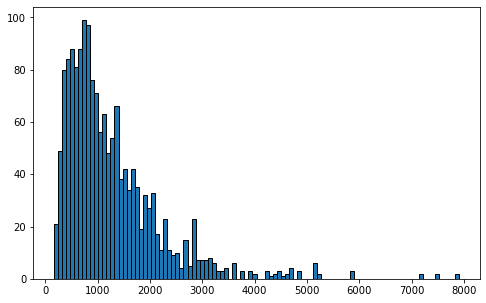

In [41]:
plot_histogram(review_count, bins = 100)

Looking at the distribution, you might notice see that it is _highly_ right skewed, (if not make sure you're plotting the right variable!)

Having skewed data is problematic. Remember in Lecture 3, we mentioned how outliers will skew the mean of the distribution. A similar thing happens in linear regression, outliers will cause the predictions to be skewed as well. 

We will solve this by taking the natural log of the data.

### Question 5b:

Use `np.log` and take the natural log of the `review_counts` data. Assigned this to the variable, `logged_review_counts`, and then plot a scatterplot of `logged_review_count` and `yelp_rating`. Put `logged_review_count` on the x-axis and `yelp_rating` on the y_axis. 

In [ ]:
## Your Code Here ...

logged_review_counts = ...

# plot scatterplot below

(<Figure size 576x360 with 1 Axes>, <AxesSubplot:>)

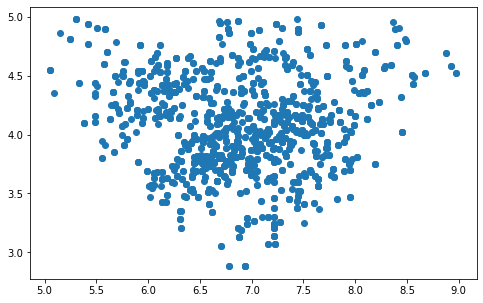

In [9]:
plot_scatter(np.log(review_count), yelp_rating)

### Question 5c:

Now, let's use out knowledge of Python and run linear regression to try and fit a line to this data. 

As before, we will be fitting a line to the data with the equation $y = mx + b$. Remember that we are using `logged_review_counts` as the input to $x$ in the equatiion, hence the $x$ in this equation represents the natural log of review counts, and the $y$ in this equation represents the yelp rating. 

Write the function `mse_yelp` that calculates the mean squared error for any given slope and intercept. `mse_yelp` should take in two arguments, a slope and an intercept, and calculate the mean squared error from preedicting yelp review ratings from the number of reviews if we used those parameters to predict the values. 

_Hint: Look back to Lab 4 for the internals of this function._ 

In [14]:
def mse_yelp(slope, intercept):
    """Calculates the MSE from predicting yelp ratin from logged review counts"""

    ## Your Code Here...

    ...

    mse = ...
    return mse

In [15]:
check('q5c', mse_yelp)

### Question 5d:

Now, use the `minimize` function to solve for the best slope and intercept. Assign these to `best_slope` and `best_intercept` accordinly.

In [ ]:
best_parameters = minimize(...)
best_slope = ...
best_intercept = ...

In [35]:
lreview_count = np.log(review_count)
best_slope = np.corrcoef(yelp_rating, lreview_count)[1,0]*np.std(yelp_rating)/np.std(lreview_count)
best_intercept = np.mean(yelp_rating) - slope*np.mean(lreview_count)
print(slope, intercept)


-0.3046767627028799 6.203485268680443


In [ ]:
check('q5d', [best_slope, best_intercept])

Run the following cell to plot the best slope and intercept on the scatterplot, we've provided the code for you! 

In [ ]:
# just run this line 
plot_q5d(best_slope, best_intercept)

### Question 5e (Optional): 

Now, we'll do the same process, but grouping the data using the pricing of the data. We'll write a big for loop for this, looping through the price data, which we've included in the variable `prices`. 

Python is a dynamic language. If you change the variable assigned to a name, functions that used that name before will update and use the latest version of whatever is assigned to the name. 

We will exploit this and quickly run four regressions without having to rewrite code over and over again. 

Fill in the following code (which we've indicated in the commented sections with "`Your Code Here...`". Please be careful not to delete any code that is written there before, and only edit the lines indicated.

Complete the following steps:
1) Inside of the for loop, assign `data` to be a subset of `scores` that only contains restaurants with the current price. Remember, in a for loop, you can access the current value in the list you are looping through by using the first argument in the for loop, in this case `price_level`.

2) Fill in the blanks of the function `mse_yelp_subset`. Instead of using the data from scores to calculate the mse, we now only want to use a subset of data that includes the specific pricelevel, which we did in step 1. Notice how we are defining 

3) Find the best slope and intercept for the subset of data

3) Access the best_slope and best_intercept and store them in the arrays, `best_slopes` and `best_intercepts`. 

You should end up with an array of 4 slopes and an array of 4 intercepts, each corresponding to the different price levels in `prices`.  

In [ ]:
prices = ["$", "$$", "$$$", "$$$$"]

best_slopes = np.array([])
best_intercepts = np.array([])

for price in prices:
    data = ... # Your Code Here

    def mse_yelp_subset(slope, intercept):

        # your code here to calculate the MSE using your subset of data

        mse = ...
        return mse
    
    best_vals = ... # Your Code Here...

    best_slopes = np.append(...) # Your Code Here ...
    best_intercepts = np.append(...) # Your Code Here ...'

    print("Best Slopes", best_slopes)
    print("Best Intercepts", best_intercepts)

In [36]:
slopes = []
intercepts = []
for price in prices:
    data = scores[scores['price'] == price]
    rating = data['rating']
    review_num = np.log(data['review_count'])
    slope = np.corrcoef(rating, review_num)[1,0]*np.std(rating)/np.std(review_num)
    intercept = np.mean(rating) - slope*np.mean(review_num)
    slopes.append(slope)
    intercepts.append(intercept)
    # plot_scatter(review_num, rating)

print(slopes)
print(intercepts)

best_slopes = slopes
best_intercepts = intercepts

[0.03192698761359747, 0.0025301277782436554, 0.030475951607835033, -0.3046767627028799]
[4.000809743775685, 4.0480400737859386, 3.7817535827874766, 6.203485268680443]


In [37]:
check('q5e1', [best_slopes, best_intercepts])

Compare the slopes of the lines of best fit within the subsets to that of regressing on the overall data. Do you notice anything interesting? 

This is sometimes called Simpson's Paradox, where when you look at subsets of a group, the correlation in the data flips. As you'll see from our results, when we regressed with the full dataset, there was a negative slope. Now, in three of the subgroups, there is a positive slope instead. 

# 4. Conclusion

Great job on finishing the project! Please save and run the following cell `check_all()` for credit! 

In [ ]:
check_all()